In [4]:
from google.colab import files
uploaded = files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your uploaded file
df = pd.read_csv('Mall_Customers.csv')

# Select relevant features
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)



In [6]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Show the number of points in each cluster
df['DBSCAN_Cluster'].value_counts()


,count
DBSCAN_Cluster,
-1,60
2,51
4,32
3,28
0,17
5,7
1,5


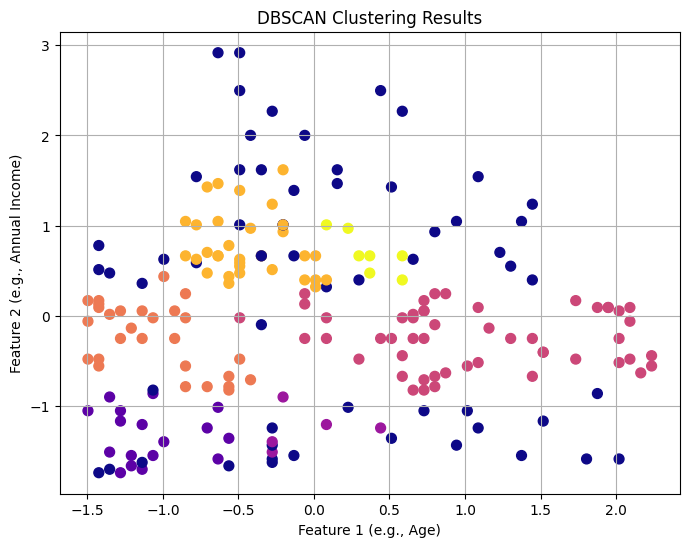

In [7]:
import matplotlib.pyplot as plt

# Visualize DBSCAN clusters (using first two features for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 2 (e.g., Annual Income)')
plt.grid(True)
plt.show()


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Retrain K-Means on the same data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Silhouette Scores
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")


K-Means Silhouette Score: 0.4085
DBSCAN Silhouette Score: 0.1845


In [10]:
# Conclusion and Recommendation
print("Conclusion:")
print("\nK-Means identified well-separated clusters, with a higher Silhouette Score, indicating better-defined groupings.")
print("DBSCAN is useful for identifying outliers and handling noise, but it may perform poorly if clusters have different densities.")

if kmeans_silhouette > dbscan_silhouette:
    print("\nRecommendation:")
    print("K-Means is more suitable for the retail company's marketing segmentation based on the current dataset.")
else:
    print("\nRecommendation:")
    print("DBSCAN is more suitable for handling noise or irregular patterns in the dataset.")


Conclusion:

K-Means identified well-separated clusters, with a higher Silhouette Score, indicating better-defined groupings.
DBSCAN is useful for identifying outliers and handling noise, but it may perform poorly if clusters have different densities.

Recommendation:
K-Means is more suitable for the retail company's marketing segmentation based on the current dataset.
